In [406]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "mobile-price-classification"

In [407]:
library(dplyr)
library(psych)
library(ggplot2)
library(corrplot)
library(ggcorrplot)

# **1. Data Import**

In [408]:
data <- read.csv('/kaggle/input/mobile-price-classification/train.csv', stringsAsFactors = F)
test  <- read.csv('/kaggle/input/mobile-price-classification/test.csv', stringsAsFactors = F)

# Variable Information

* **pc : Primary Camera mega pixels**
* **fc : Front Camera mega pixels**
* **sc_h : Screen Height of mobile in cm**
* **sc_w     :       Screen Width of mobile in cm**
* **m_dep       :   Mobile Depth in cm**
* **px_width    :    Pixel Resolution Width**
* **px_height   :   Pixel Resolution Height**
* **ram      :    Random Access Memory in Mega Bytes**
* **int_memory  :  Internal Memory in Giga Bytes**
* **four_g     :   Has 4G or not**
* **three_g    :  Has 3G or not**
* **dual_sim      :  Has dual sim support or not**
* **battery_power  : Total energy a battery can store in one time measured in mAh**
* **touch_screen   : Has touch screen or not**
* **clock_speed:  Speed at which microprocessor executes instructions**
* **n_cores     : Number of cores of processor**
* **wifi        :    Has wifi or not**
* **blue        :    Has bluetooth or not**
* **mobile_wt   :   Weight of mobile phone**
* **talk_time   :   Longest time that a single battery charge will last when you are**
* **price_range  : This is the target variable with value of 0(low cost),1(medium cost), 2(high cost) and 3(very high cost).**

# 1-1. Data Structure

In [409]:
str(data)

'data.frame':	2000 obs. of  21 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : int  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : int  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : int  20 905 1263 1216 1208 1004 381 512 386 1137 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_h         : int  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : i

In [410]:
dim(data)

[1] 2000   21

In [411]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
battery_power,1,2000,1238.51850,439.4182061,1226.0,1236.2506250,566.35320,501.0,1998,1497.0,0.031850640,-1.2258596,9.825689794
blue,2,2000,0.49500,0.5001000,0.0,0.4937500,0.00000,0.0,1,1.0,0.019986001,-2.0006001,0.011182577
clock_speed,3,2000,1.52225,0.8160042,1.5,1.4845000,1.18608,0.5,3,2.5,0.177817083,-1.3247860,0.018246409
dual_sim,4,2000,0.50950,0.5000348,1.0,0.5118750,0.00000,0.0,1,1.0,-0.037978359,-1.9995567,0.011181117
fc,5,2000,4.30950,4.3414437,3.0,3.6881250,4.44780,0.0,19,19.0,1.018282203,0.2701131,0.097077633
four_g,6,2000,0.52150,0.4996625,1.0,0.5268750,0.00000,0.0,1,1.0,-0.086015066,-1.9935975,0.011172792
int_memory,7,2000,32.04650,18.1457150,32.0,31.8806250,23.72160,2.0,64,62.0,0.057802523,-1.2178180,0.405750521
m_dep,8,2000,0.50175,0.2884155,0.5,0.4955625,0.44478,0.1,1,0.9,0.088948431,-1.2758891,0.006449168
mobile_wt,9,2000,140.24900,35.3996549,141.0,140.2187500,45.96060,80.0,200,120.0,0.006548323,-1.2121404,0.791560347


In [412]:
summary(data)

 battery_power         blue        clock_speed       dual_sim     
 Min.   : 501.0   Min.   :0.000   Min.   :0.500   Min.   :0.0000  
 1st Qu.: 851.8   1st Qu.:0.000   1st Qu.:0.700   1st Qu.:0.0000  
 Median :1226.0   Median :0.000   Median :1.500   Median :1.0000  
 Mean   :1238.5   Mean   :0.495   Mean   :1.522   Mean   :0.5095  
 3rd Qu.:1615.2   3rd Qu.:1.000   3rd Qu.:2.200   3rd Qu.:1.0000  
 Max.   :1998.0   Max.   :1.000   Max.   :3.000   Max.   :1.0000  
       fc             four_g         int_memory        m_dep       
 Min.   : 0.000   Min.   :0.0000   Min.   : 2.00   Min.   :0.1000  
 1st Qu.: 1.000   1st Qu.:0.0000   1st Qu.:16.00   1st Qu.:0.2000  
 Median : 3.000   Median :1.0000   Median :32.00   Median :0.5000  
 Mean   : 4.309   Mean   :0.5215   Mean   :32.05   Mean   :0.5018  
 3rd Qu.: 7.000   3rd Qu.:1.0000   3rd Qu.:48.00   3rd Qu.:0.8000  
 Max.   :19.000   Max.   :1.0000   Max.   :64.00   Max.   :1.0000  
   mobile_wt        n_cores            pc           px_

**Check missing value**

In [413]:
sum(is.na(data))

[1] 0

In [414]:
head(data)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,⋯,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,842,0,2.2,0,1,0,7,0.6,188,2,⋯,20,756,2549,9,7,19,0,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,⋯,905,1988,2631,17,3,7,1,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,⋯,1263,1716,2603,11,2,9,1,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,⋯,1216,1786,2769,16,8,11,1,0,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,⋯,1208,1212,1411,8,2,15,1,1,0,1
6,1859,0,0.5,1,3,0,22,0.7,164,1,⋯,1004,1654,1067,17,1,10,1,0,0,1


In [415]:
str(test)

'data.frame':	1000 obs. of  21 variables:
 $ id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ battery_power: int  1043 841 1807 1546 1434 1464 1718 833 1111 1520 ...
 $ blue         : int  1 1 1 0 0 1 0 0 1 0 ...
 $ clock_speed  : num  1.8 0.5 2.8 0.5 1.4 2.9 2.4 2.4 2.9 0.5 ...
 $ dual_sim     : int  1 1 0 1 0 1 0 1 1 0 ...
 $ fc           : int  14 4 1 18 11 5 1 0 9 1 ...
 $ four_g       : int  0 1 0 1 1 1 0 0 1 0 ...
 $ int_memory   : int  5 61 27 25 49 50 47 62 25 25 ...
 $ m_dep        : num  0.1 0.8 0.9 0.5 0.5 0.8 1 0.8 0.6 0.5 ...
 $ mobile_wt    : int  193 191 186 96 108 198 156 111 101 171 ...
 $ n_cores      : int  3 5 3 8 6 8 2 1 5 3 ...
 $ pc           : int  16 12 4 20 18 9 3 2 19 20 ...
 $ px_height    : int  226 746 1270 295 749 569 1283 1312 556 52 ...
 $ px_width     : int  1412 857 1366 1752 810 939 1374 1880 876 1009 ...
 $ ram          : int  3476 3895 2396 3893 1773 3506 3873 1495 3485 651 ...
 $ sc_h         : int  12 6 17 10 15 10 14 7 11 6 ...
 $ sc_w         : 

In [416]:
dim(test)

[1] 1000   21

In [417]:
describe(test)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,1000,500.5000,288.8194361,500.5,500.500000,370.65000,1.0,1000,999.0,0.000000000,-1.20360060,9.13327251
battery_power,2,1000,1248.5100,432.4582269,1246.5,1246.865000,541.14900,500.0,1999,1499.0,0.038654792,-1.17506222,13.67552990
blue,3,1000,0.5160,0.4999940,1.0,0.520000,0.00000,0.0,1,1.0,-0.063936768,-1.99790700,0.01581120
clock_speed,4,1000,1.5409,0.8292677,1.5,1.504625,1.18608,0.5,3,2.5,0.185380838,-1.34292628,0.02622375
dual_sim,5,1000,0.5170,0.4999610,1.0,0.521250,0.00000,0.0,1,1.0,-0.067937305,-1.99737890,0.01581015
fc,6,1000,4.5930,4.4633252,3.0,3.981250,4.44780,0.0,19,19.0,0.986581036,0.24290816,0.14114274
four_g,7,1000,0.4870,0.5000811,0.0,0.483750,0.00000,0.0,1,1.0,0.051939578,-1.99929858,0.01581395
int_memory,8,1000,33.6520,18.1286940,34.5,33.802500,22.98030,2.0,64,62.0,-0.071566258,-1.16054867,0.57327964
m_dep,9,1000,0.5175,0.2808605,0.5,0.515750,0.29652,0.1,1,0.9,0.014012345,-1.21047370,0.00888159


In [418]:
summary(test)

       id         battery_power       blue        clock_speed   
 Min.   :   1.0   Min.   : 500   Min.   :0.000   Min.   :0.500  
 1st Qu.: 250.8   1st Qu.: 895   1st Qu.:0.000   1st Qu.:0.700  
 Median : 500.5   Median :1246   Median :1.000   Median :1.500  
 Mean   : 500.5   Mean   :1249   Mean   :0.516   Mean   :1.541  
 3rd Qu.: 750.2   3rd Qu.:1629   3rd Qu.:1.000   3rd Qu.:2.300  
 Max.   :1000.0   Max.   :1999   Max.   :1.000   Max.   :3.000  
    dual_sim           fc             four_g        int_memory   
 Min.   :0.000   Min.   : 0.000   Min.   :0.000   Min.   : 2.00  
 1st Qu.:0.000   1st Qu.: 1.000   1st Qu.:0.000   1st Qu.:18.00  
 Median :1.000   Median : 3.000   Median :0.000   Median :34.50  
 Mean   :0.517   Mean   : 4.593   Mean   :0.487   Mean   :33.65  
 3rd Qu.:1.000   3rd Qu.: 7.000   3rd Qu.:1.000   3rd Qu.:49.00  
 Max.   :1.000   Max.   :19.000   Max.   :1.000   Max.   :64.00  
     m_dep          mobile_wt        n_cores            pc       
 Min.   :0.1000  

**Check missing value**

In [419]:
sum(is.na(test))

[1] 0

In [420]:
head(test)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,⋯,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1043,1,1.8,1,14,0,5,0.1,193,⋯,16,226,1412,3476,12,7,2,0,1,0
2,2,841,1,0.5,1,4,1,61,0.8,191,⋯,12,746,857,3895,6,0,7,1,0,0
3,3,1807,1,2.8,0,1,0,27,0.9,186,⋯,4,1270,1366,2396,17,10,10,0,1,1
4,4,1546,0,0.5,1,18,1,25,0.5,96,⋯,20,295,1752,3893,10,0,7,1,1,0
5,5,1434,0,1.4,0,11,1,49,0.5,108,⋯,18,749,810,1773,15,8,7,1,0,1
6,6,1464,1,2.9,1,5,1,50,0.8,198,⋯,9,569,939,3506,10,7,3,1,1,1


# 1-2. Data Preprocessing

In [421]:
data$price_range <- ifelse(data$price_range == 0,'Low Cost',
                               (ifelse(data$price_range == 1, 'Medium Cost',
                                   (ifelse(data$price_range == 2, 'High Cost',
                                       (ifelse(data$price_range == 3, 'Very High Cost','error')))))))

# 0 -> 'Low Cost' , 1 -> 'Medium Cost', 2 -> 'High Cost' , 3 -> 'Very High Cost'


data$price_range <- as.factor(data$price_range)

# **2. Data Visualization**

In [422]:
table(data$price_range)


     High Cost       Low Cost    Medium Cost Very High Cost 
           500            500            500            500 

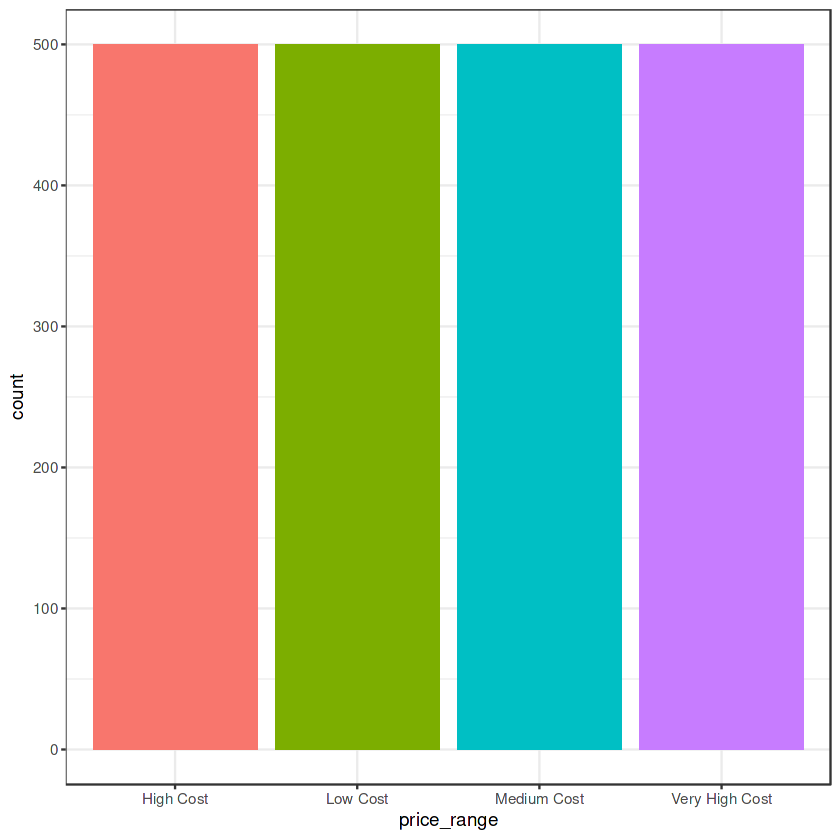

In [423]:
ggplot(data, aes(x= price_range, fill = price_range)) +
    geom_bar() +
    theme_bw() +
    theme(legend.position="none")

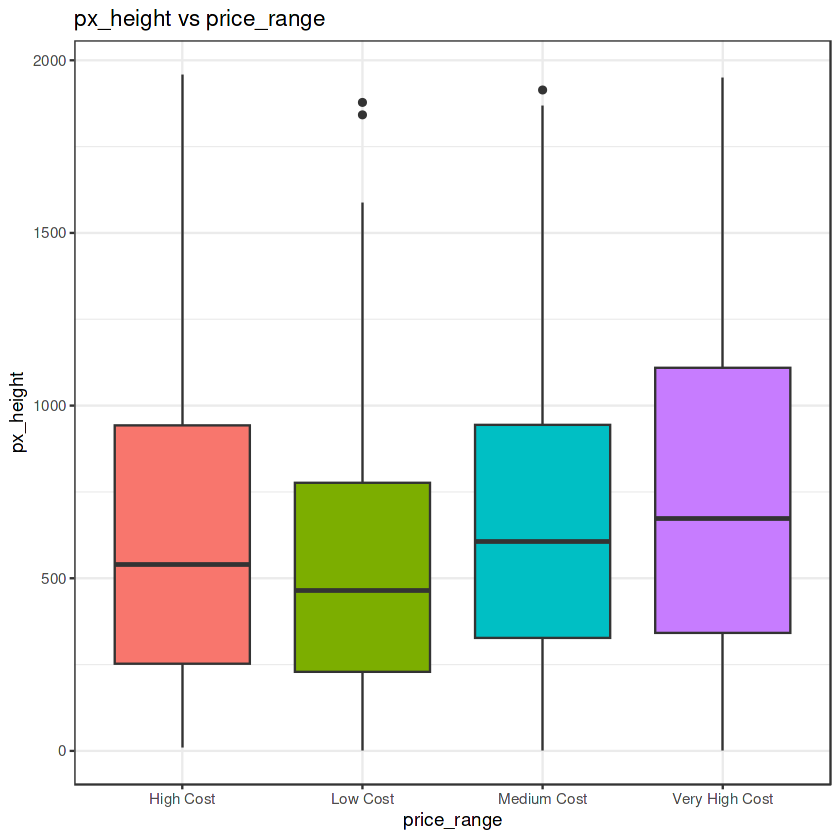

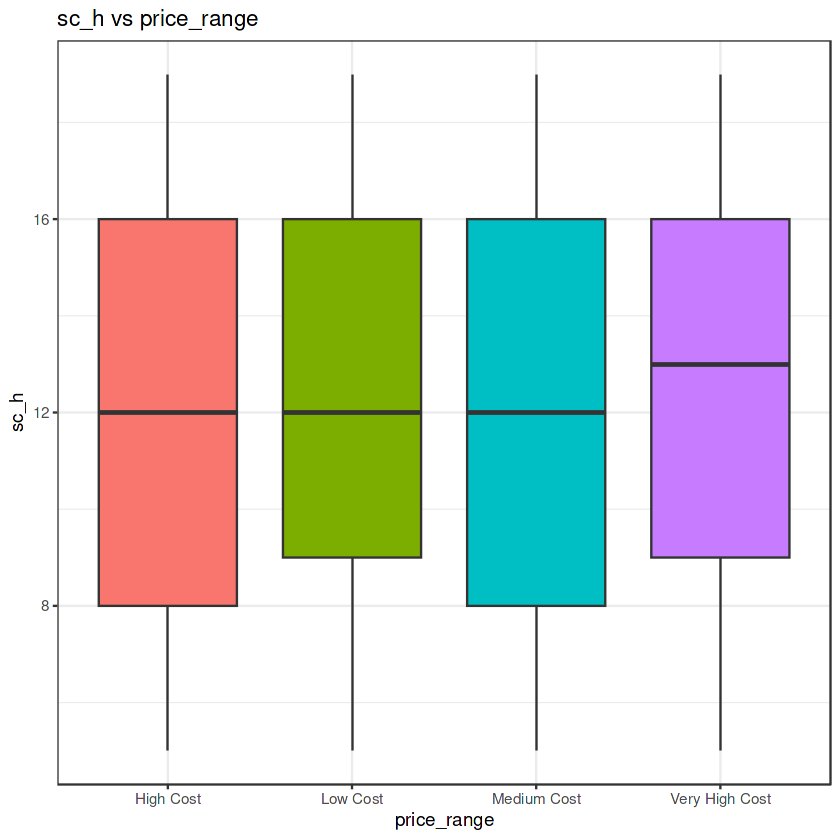

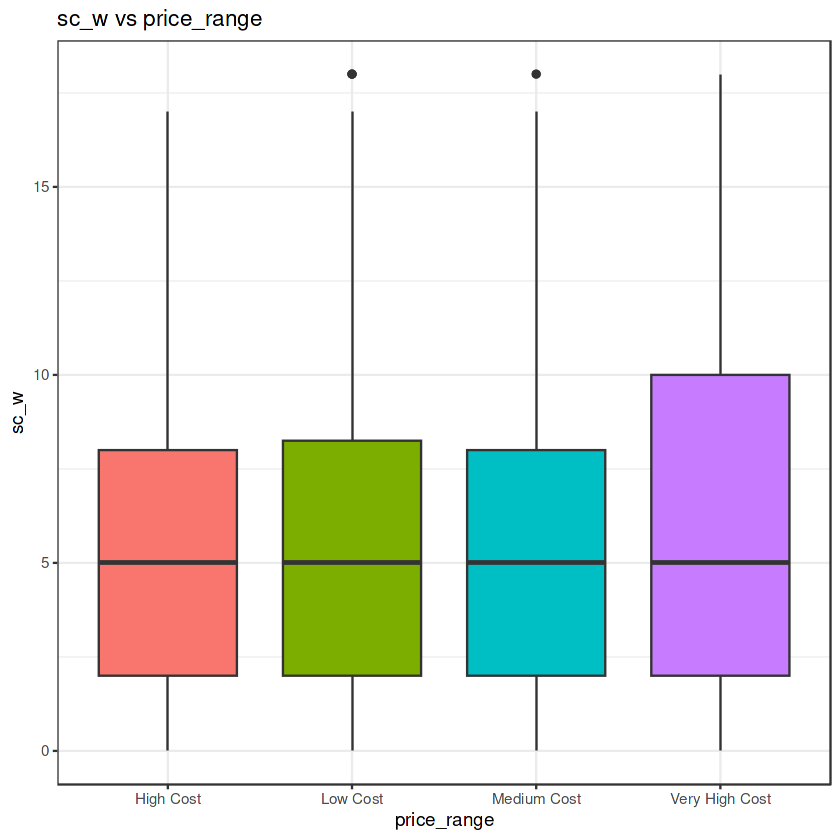

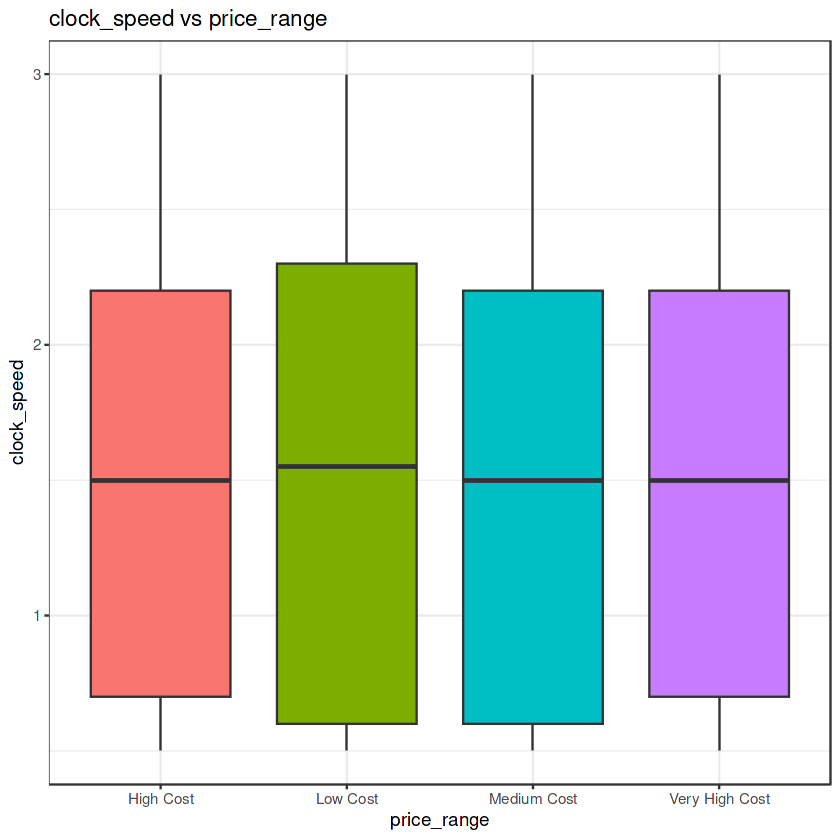

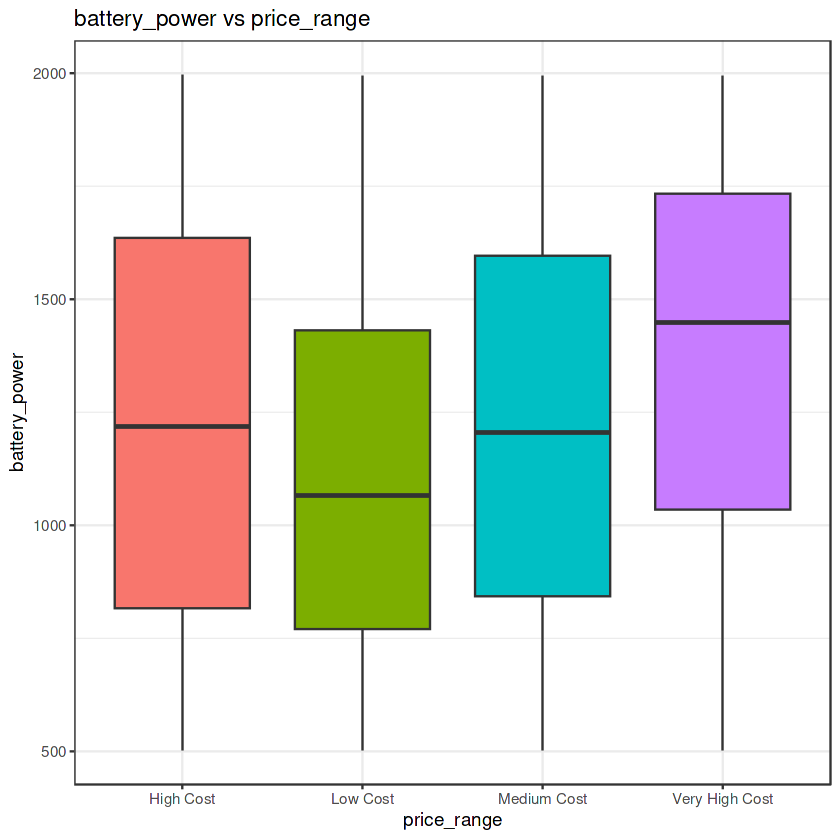

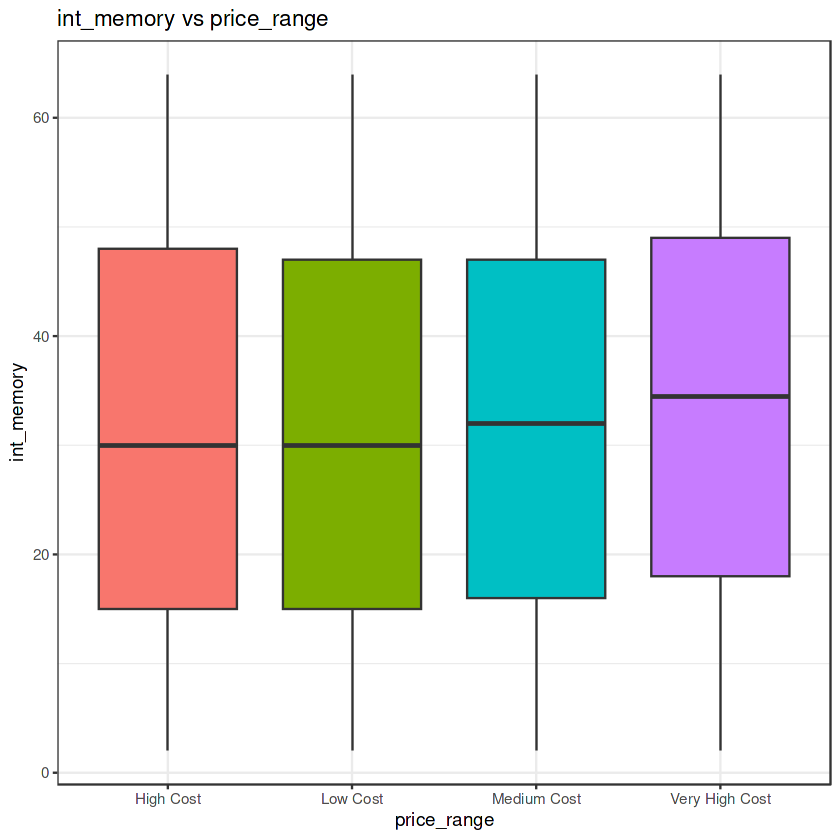

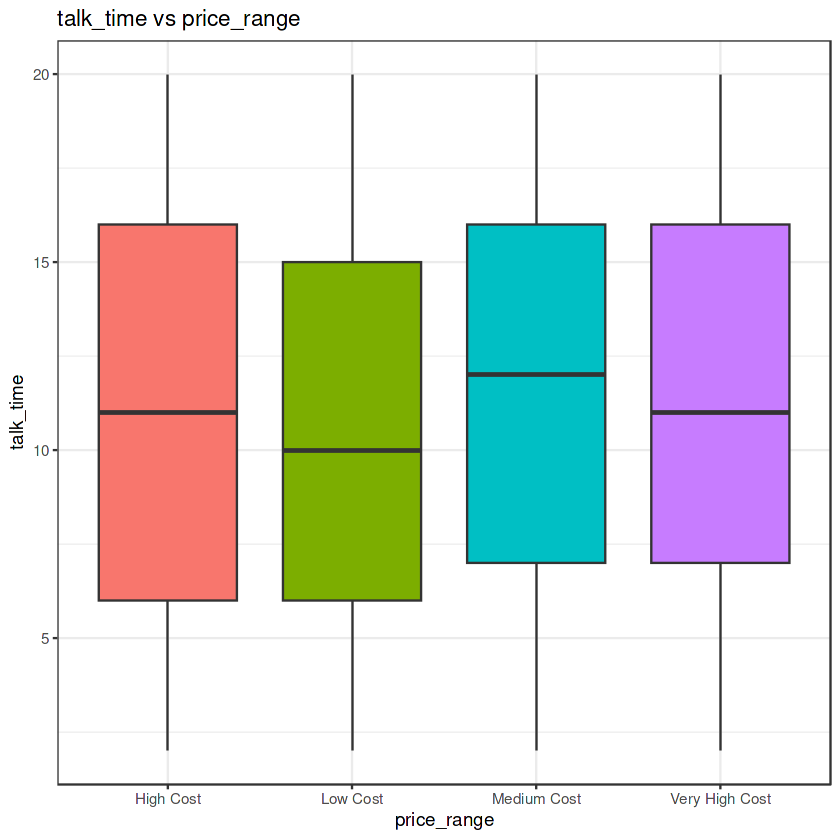

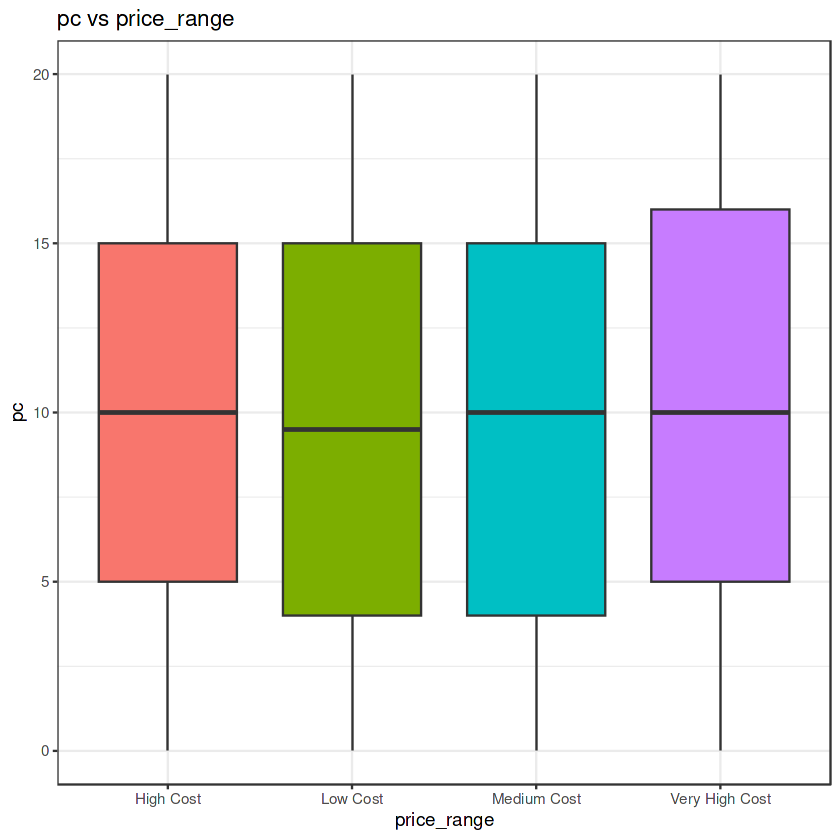

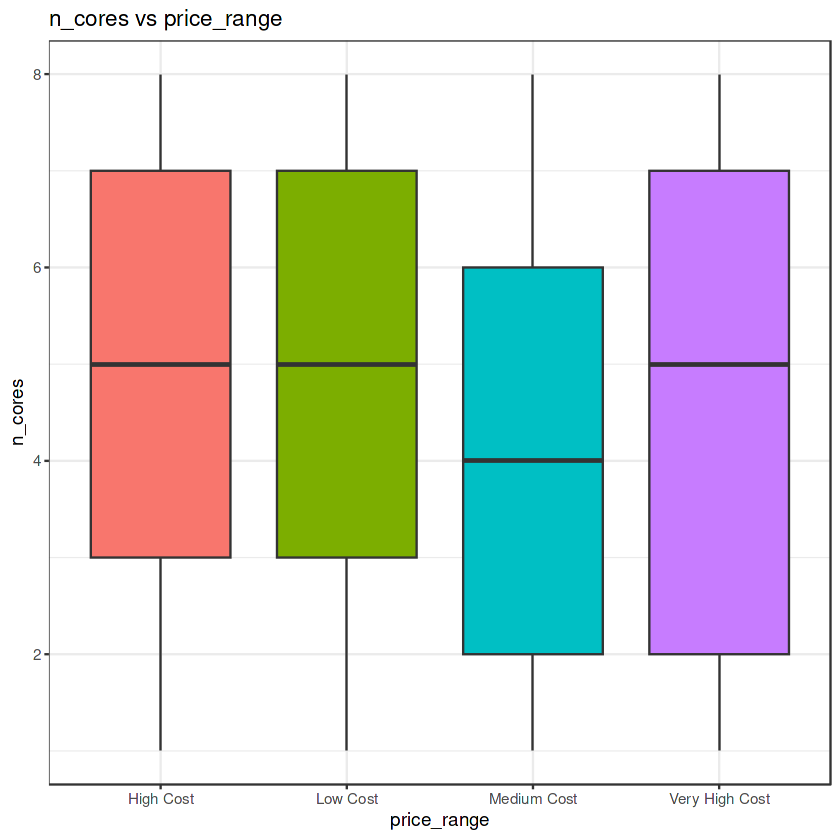

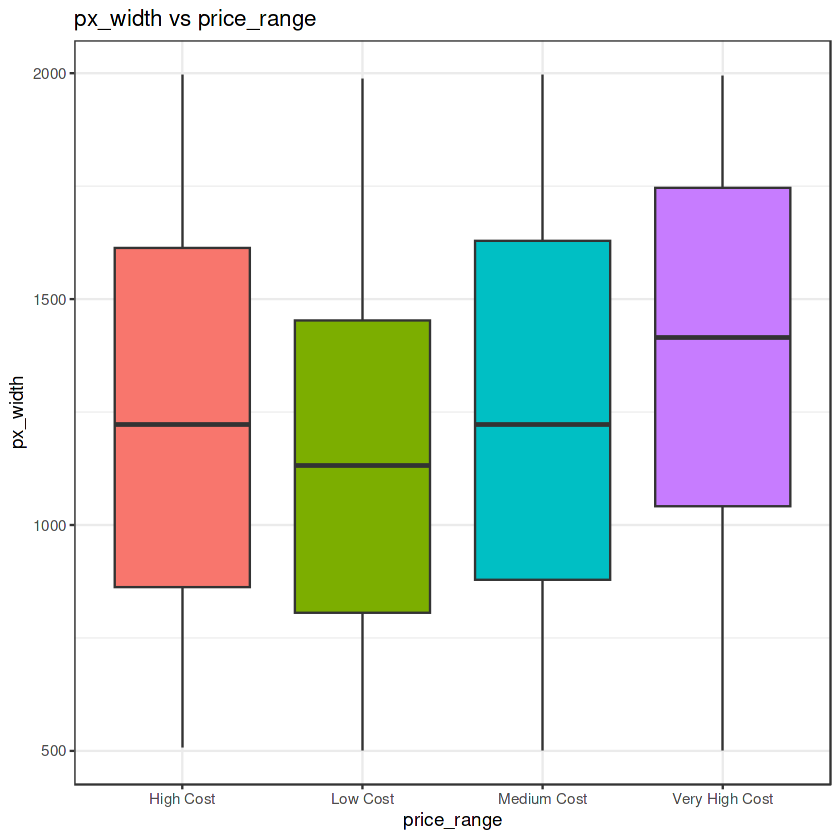

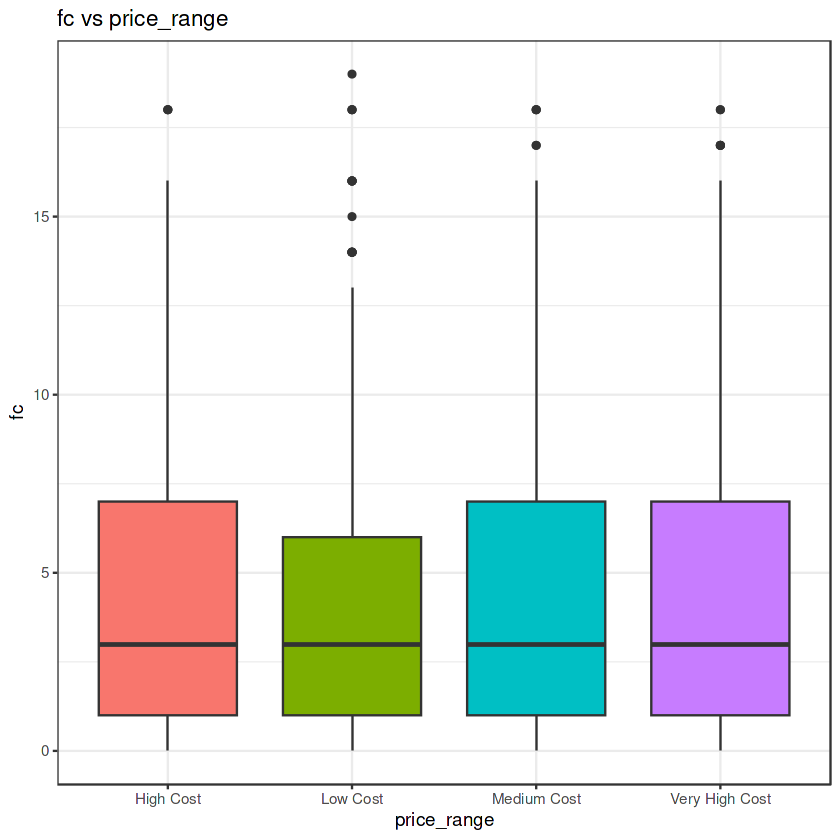

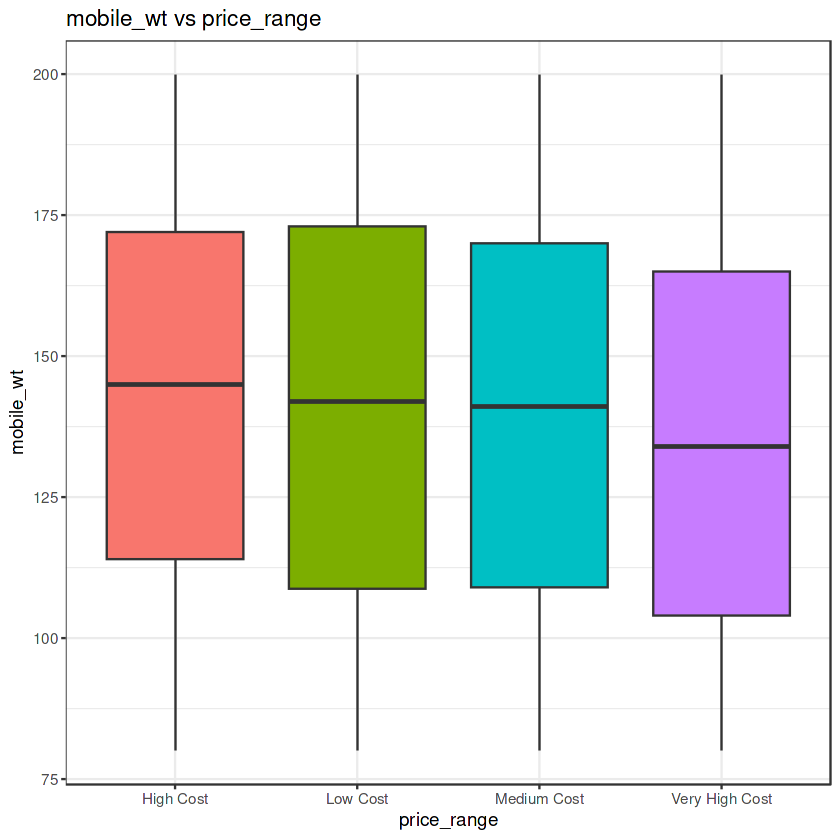

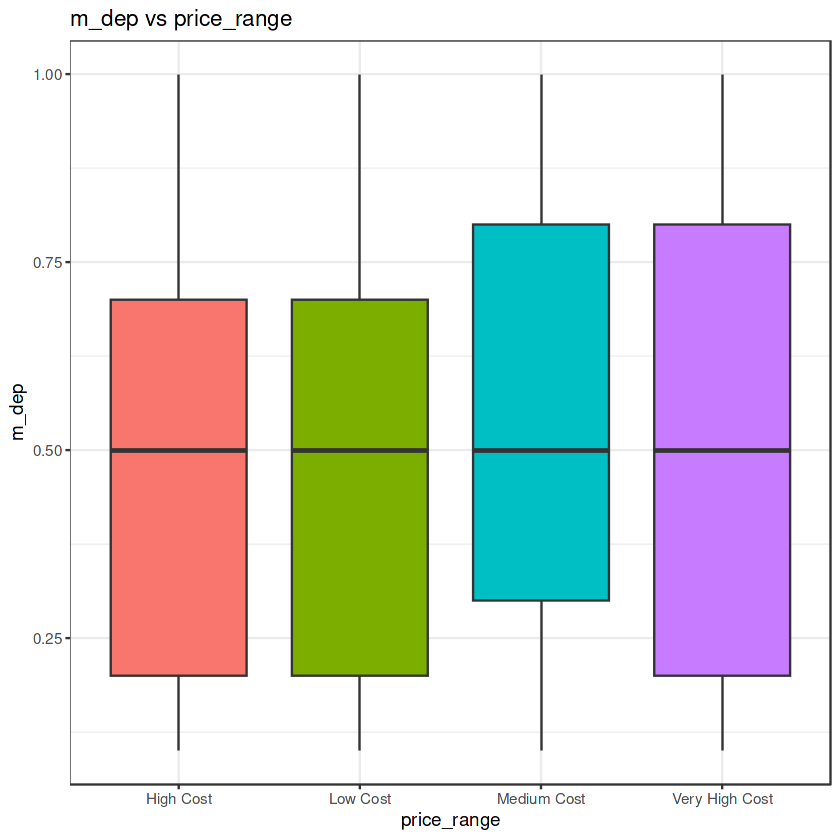

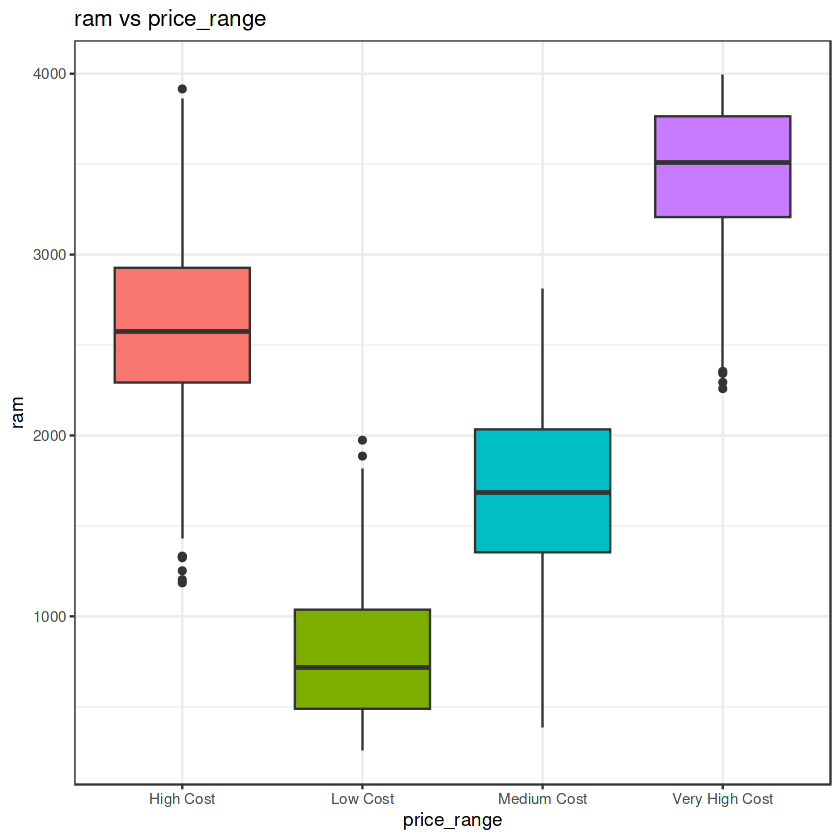

In [425]:
cols <-c('px_height', 'sc_h', 'sc_w', 'clock_speed', 'battery_power', 'int_memory', 'talk_time', 'pc',
           'n_cores', 'px_width', 'fc', 'mobile_wt', 'm_dep', 'ram')

for(i in cols){
    print(ggplot(data, aes(x=price_range, y=data[,i], fill = price_range)) + geom_boxplot()+ ylab(i) +theme_bw() + theme(legend.position="none" ) + ggtitle(paste(i,'vs price_range')))
}

**Check the correlation**

In [426]:
c <- cor(data[,c('px_height', 'sc_h', 'sc_w', 'clock_speed', 'battery_power', 'int_memory', 'talk_time', 'pc',
           'n_cores', 'px_width', 'fc', 'mobile_wt', 'm_dep', 'ram')])

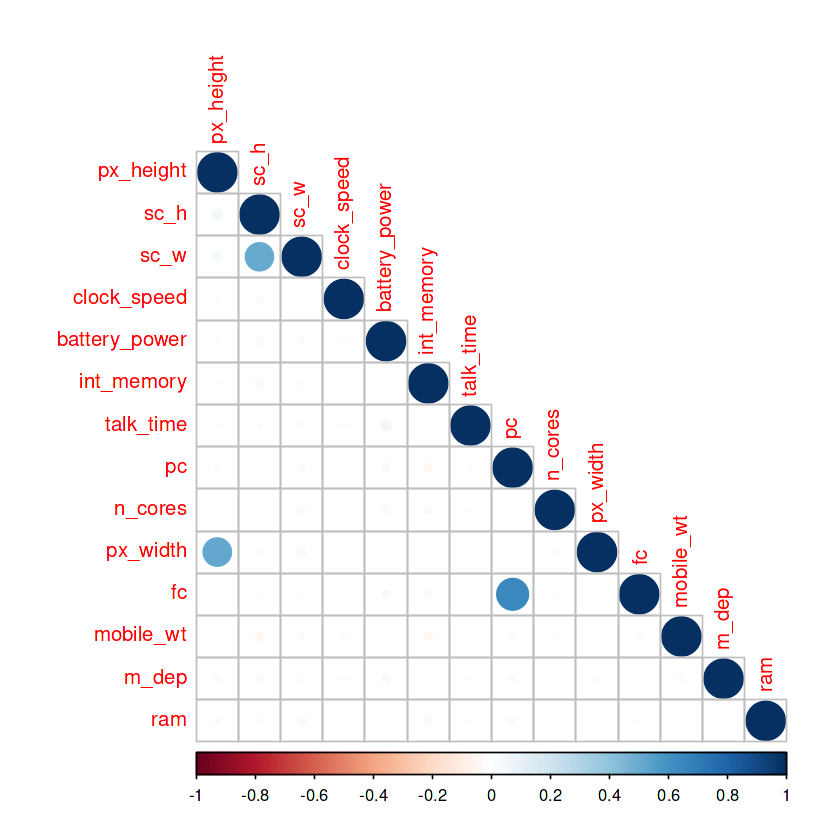

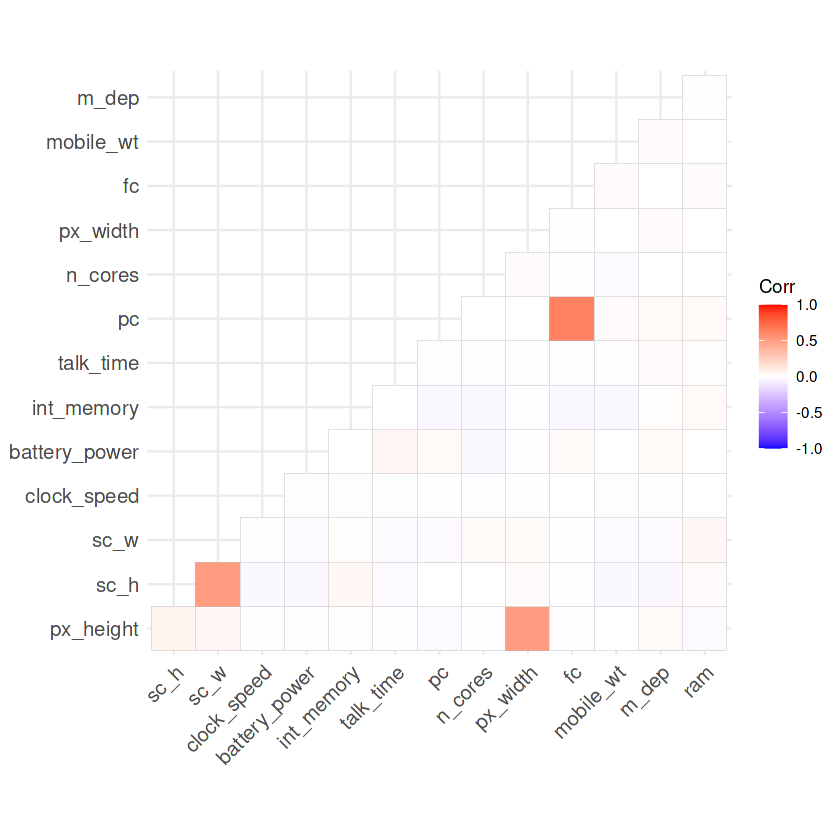

In [427]:
corrplot(c,type = "lower")
ggcorrplot(c,type = "lower")

# **3. Modeling**

# 3-1. Import & Prepare

In [440]:
library(randomForest)
library(e1071)
library(caret)

In [429]:
idx <- sample(1:nrow(train),nrow(train)*0.75)
train <- data[idx,]
valid <- data[-idx,]

# 3-2. RandomForestModel

In [430]:
md_rf <- randomForest(price_range~.,data = train, ntree=300 )

In [431]:
pred <- predict(md_rf, newdata = valid)

In [434]:
confusionMatrix(pred,reference = valid$price_range)

Confusion Matrix and Statistics

                Reference
Prediction       High Cost Low Cost Medium Cost Very High Cost
  High Cost            165        0          32             20
  Low Cost               0      212          14              0
  Medium Cost           26       16         174              0
  Very High Cost        17        0           0            199

Overall Statistics
                                          
               Accuracy : 0.8571          
                 95% CI : (0.8322, 0.8797)
    No Information Rate : 0.2606          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8095          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Cost Class: Low Cost Class: Medium Cost
Sensitivity                    0.7933          0.9298             0.7909
Specificity                    0.9220          0.9

# Accuracy : 85.71 %
# Error rate : 14.29 %

# Apply the model to the test data

In [435]:
md_rf2 <- randomForest(price_range~., data = data, ntree=300)

In [436]:
pred2 <- predict(md_rf2,newdata = test)

In [437]:
table(pred2)

pred2
     High Cost       Low Cost    Medium Cost Very High Cost 
           243            255            246            256 

# 3-3. SVM

In [442]:
md_svm <- svm(price_range~., data = train,type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [443]:
pred <- predict(md_svm,newdata = valid)

In [446]:
confusionMatrix(pred,reference = valid$price_range)

Confusion Matrix and Statistics

                Reference
Prediction       High Cost Low Cost Medium Cost Very High Cost
  High Cost            148        0          35             30
  Low Cost               0      197          23              0
  Medium Cost           35       31         162              0
  Very High Cost        25        0           0            189

Overall Statistics
                                          
               Accuracy : 0.7954          
                 95% CI : (0.7672, 0.8217)
    No Information Rate : 0.2606          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7272          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Cost Class: Low Cost Class: Medium Cost
Sensitivity                    0.7115          0.8640             0.7364
Specificity                    0.9025          0.9

# Accuracy : 79.54 %
# Error rate : 20.46 %

# Apply the model to the test data

In [447]:
md_svm2 <- svm(price_range~., data = data,type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [448]:
pred2 <- predict(md_svm2,newdata = test)

In [449]:
table(pred2)

pred2
     High Cost       Low Cost    Medium Cost Very High Cost 
           251            245            254            250 

# Model with better random forest